# Trabajo Practico N1
## 2. Regresión logística

## Participantes:
- **Alexis Aramis Torchinsky**

In [85]:
import pandas as pd
import numpy as np
locPath=!pwd
locPath=locPath[0]

## 2.2 - training data
fnData=locPath+'/datos2_entrenamiento.csv'
dataCsv  = pd.read_csv(fnData, encoding = "ISO-8859-1")

examenes=np.array(dataCsv)[:,[0,1]]
examenesAprobados=np.array([[i[0],i[1]] for i in np.array(dataCsv) if i[2]==1])
examenesNoAprobados=np.array([[i[0],i[1]] for i in np.array(dataCsv) if i[2]==0])
desiciones=np.array(dataCsv)[:,2]
print("DATA: ")
print("------")
print(dataCsv.head())
# 2.4
print("-----------Todos los examenes---------------")
print(examenes[:5])
print("-----------Examenes Aprobados---------------")
print(examenesAprobados[:5])
print("----------Examenes No Aprobados-------------")
print(examenesNoAprobados[:5])
# 2.5
print("--------------------------")
print(dataCsv.describe())


## 2.3 - test data
fnValData=locPath+'/datos2_validacion.csv'
valCsv = pd.read_csv(fnValData, encoding = "ISO-8859-1")
examenesVal=np.array(valCsv)[:,[0,1]]
desicionesVal=np.array(valCsv)[:,2]

DATA: 
------
   Examen1  Examen2  Decision
0    42.26    87.10         1
1    35.85    72.90         0
2    67.32    66.59         1
3    55.48    35.57         0
4    50.46    75.81         1
-----------Todos los examenes---------------
[[42.26 87.1 ]
 [35.85 72.9 ]
 [67.32 66.59]
 [55.48 35.57]
 [50.46 75.81]]
-----------Examenes Aprobados---------------
[[42.26 87.1 ]
 [67.32 66.59]
 [50.46 75.81]
 [97.65 68.86]
 [75.4  85.76]]
----------Examenes No Aprobados-------------
[[35.85 72.9 ]
 [55.48 35.57]
 [74.79 41.57]
 [51.05 45.82]
 [93.11 38.8 ]]
--------------------------
         Examen1    Examen2   Decision
count  80.000000  80.000000  80.000000
mean   65.686000  66.519375   0.600000
std    20.287709  18.646059   0.492989
min    30.060000  30.600000   0.000000
25%    50.417500  49.407500   0.000000
50%    65.465000  68.820000   1.000000
75%    82.250000  79.357500   1.000000
max    99.830000  98.870000   1.000000


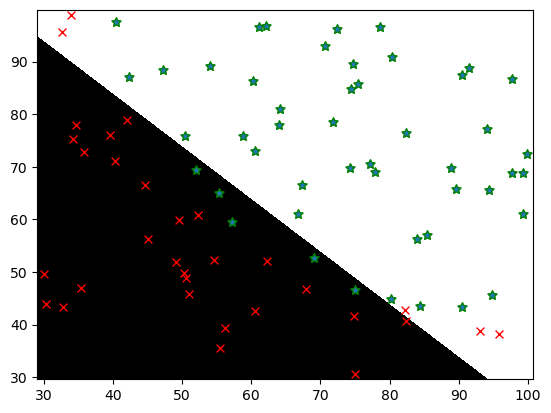

In [101]:
import numpy as np
from sklearn import linear_model 
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
# 2.6
# set puntos extremos del grafico
x_min, x_max = min(examenes[:, 0]) - 1.0, max(examenes[:, 0]) + 1.0
y_min, y_max = min(examenes[:, 1]) - 1.0, max(examenes[:, 1]) + 1.0
step_size = 0.01

valor_x, valor_y = np.meshgrid(np.arange(x_min, x_max, step_size), np.arange(y_min, y_max, step_size))
malla_de_puntos = clasificador.predict(np.c_[valor_x.ravel(), valor_y.ravel()])
malla_de_puntos = malla_de_puntos.reshape(valor_x.shape)

plt.figure()
plt.pcolormesh(
    valor_x, 
    valor_y, 
    malla_de_puntos, 
    cmap=plt.cm.gray,
    shading='auto')

# graficar examenes de clase 1:aprobados
plt.scatter(
    examenesAprobados[:, 0], 
    examenesAprobados[:, 1], 
    s=len(examenesAprobados), 
    edgecolors='green', 
    linewidth=1, 
    marker=(5, 1))

# graficar examenes de clase 0:desaprobados
plt.scatter(
    examenesNoAprobados[:, 0], 
    examenesNoAprobados[:, 1], 
    s=len(examenesNoAprobados), 
    facecolors='red', 
    linewidth=1, 
    marker="x")
plt.show()

In [106]:
# 2.7
from sklearn import linear_model
clasificador = linear_model.LogisticRegression(solver='lbfgs', C=100)
clasificador.fit(examenes, desiciones)


LogisticRegression(C=100)

In [113]:
#predictions based on validation data
desicionesPredict = clasificador.predict(examenes)
print(desicionesPredict)
print(clasificador.score(examenes,desiciones))
desicionesValPredict = clasificador.predict(examenesVal)
print("Prediccion sobre Examenes de Validacion: ", desicionesValPredict)
print("Desiciones sobre Examenes de Validacion: ", desicionesVal)


[1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1.
 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0.
 0. 0. 1. 1. 1. 1. 0. 0.]
0.875
Prediccion sobre Examenes de Validacion:  [1. 0. 0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1.]
Desiciones sobre Examenes de Validacion:  [1. 0. 0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1.]


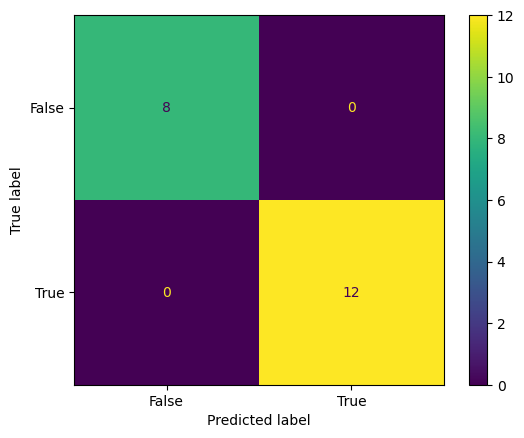

In [105]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(desicionesVal, desicionesPredict)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()